# Looking for patterns in random sequences
Yehor created a directed graph of the 2-digit chaotic feedback function we examined in class.
This is a very cool way of visualizing the system - it shows all possible transitions, revealing loops and other structures.

In [1]:
import time

import matplotlib.pyplot as plt
import networkx as nx

In [4]:
class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milli-seconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed

r = TwoDigitRand()
[r.rand() for i in range(100)]

[22,
 16,
 43,
 25,
 37,
 52,
 19,
 64,
 34,
 31,
 10,
 1,
 7,
 49,
 67,
 55,
 40,
 4,
 28,
 58,
 61,
 13,
 22,
 16,
 43,
 25,
 37,
 52,
 19,
 64,
 34,
 31,
 10,
 1,
 7,
 49,
 67,
 55,
 40,
 4,
 28,
 58,
 61,
 13,
 22,
 16,
 43,
 25,
 37,
 52,
 19,
 64,
 34,
 31,
 10,
 1,
 7,
 49,
 67,
 55,
 40,
 4,
 28,
 58,
 61,
 13,
 22,
 16,
 43,
 25,
 37,
 52,
 19,
 64,
 34,
 31,
 10,
 1,
 7,
 49,
 67,
 55,
 40,
 4,
 28,
 58,
 61,
 13,
 22,
 16,
 43,
 25,
 37,
 52,
 19,
 64,
 34,
 31,
 10,
 1]

## Generate a directional graph
Each edge shows the next value in sequence from the source node.

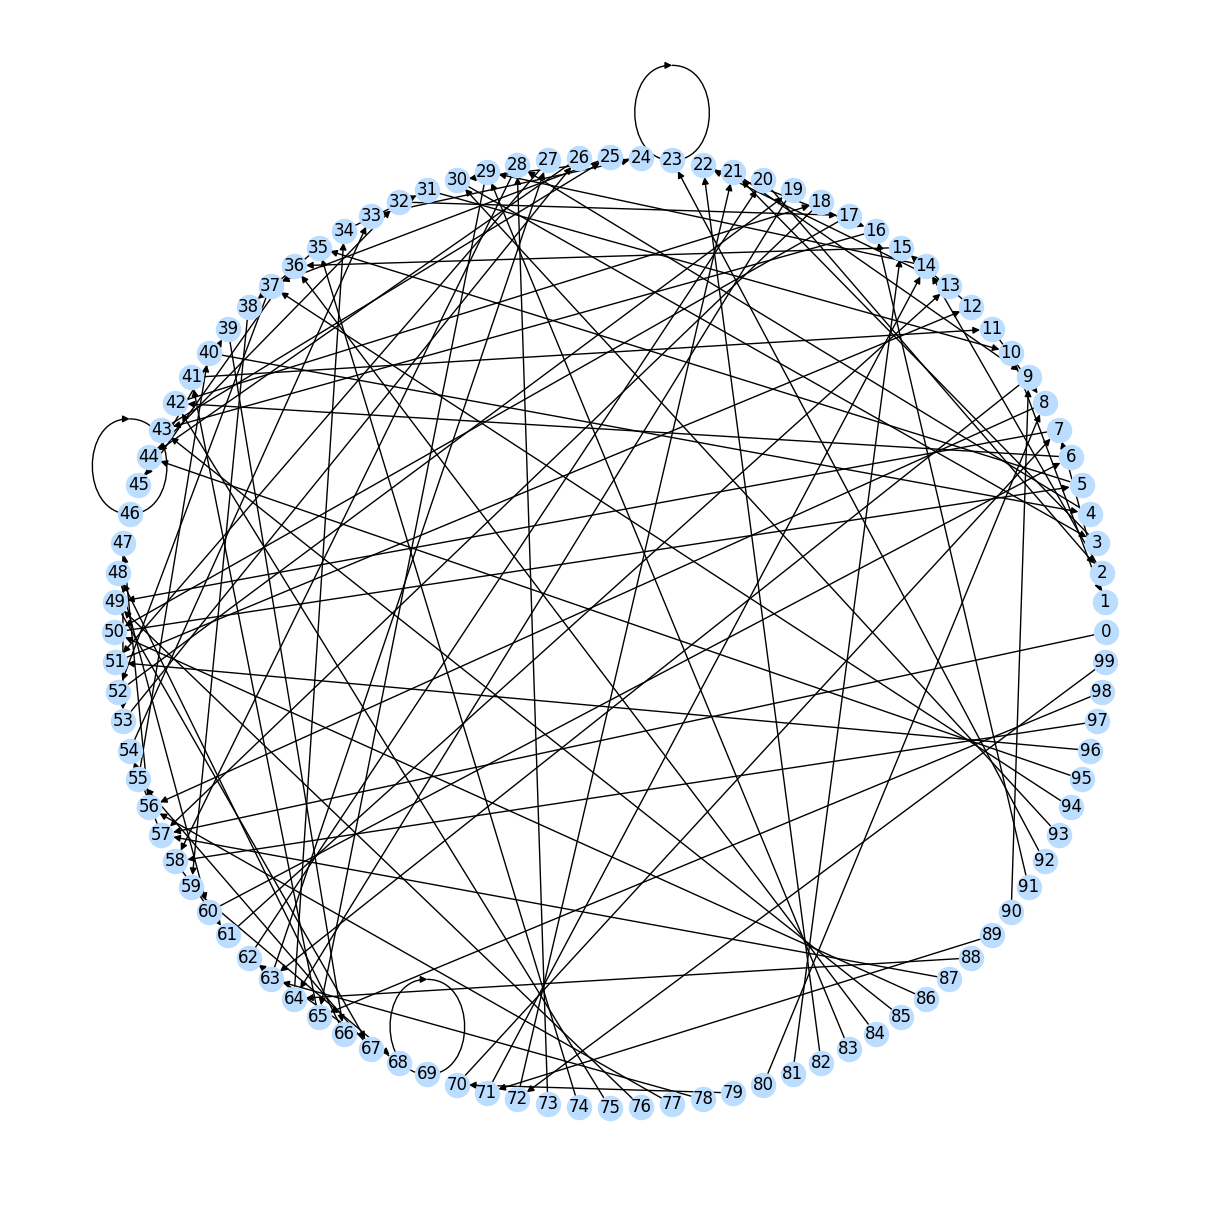

In [3]:
g = nx.DiGraph()
nodes = list(range(100))  ## all 1 and 2 digit positive numbers
g.add_nodes_from(nodes)

for source in nodes:
    r = TwoDigitRand(seed=source)
    dest = r.rand()
    g.add_edge(source, dest)

plt.figure(figsize=(12,12))
nx.draw_circular(g,
                 node_color='#bbddff',
                 with_labels=True,)
plt.show()

### Observations
So many interesting things in this display.   For example, we see there are 3 "tight loops" where the generator outputs the same value every time.  We can also see there are many nodes that are not part of any sequence -- i.e., they are never the destination.  For example, every node with a value > 72.

### Visualizing these results further
Yehor asked me how one could plot the "sources" for each "destination" value as a way of visualizing how frequently we might expect a given value to occur in a sequence initialized with a random seed.

[(10, 1), (20, 2), (30, 3), (40, 4), (50, 5), (60, 6), (70, 7), (80, 8), (1, 9), (90, 9), (11, 10), (21, 11), (31, 12), (41, 13), (51, 14), (61, 15), (71, 16), (81, 17), (2, 18), (91, 18), (12, 19), (22, 20), (32, 21), (42, 22), (52, 23), (62, 24), (72, 25), (82, 26), (3, 27), (92, 27), (13, 28), (23, 29), (33, 30), (43, 31), (53, 32), (63, 33), (73, 34), (83, 35), (4, 36), (93, 36), (14, 37), (24, 38), (34, 39), (44, 40), (54, 41), (64, 42), (74, 43), (84, 44), (5, 45), (94, 45), (15, 46), (25, 47), (35, 48), (45, 49), (55, 50), (65, 51), (75, 52), (85, 53), (6, 54), (95, 54), (16, 55), (26, 56), (36, 57), (46, 58), (56, 59), (66, 60), (76, 61), (86, 62), (7, 63), (96, 63), (17, 64), (27, 65), (37, 66), (47, 67), (57, 68), (67, 69), (77, 70), (87, 71), (8, 72), (97, 72), (18, 73), (28, 74), (38, 75), (48, 76), (58, 77), (68, 78), (78, 79), (88, 80), (9, 81), (98, 81), (19, 82), (29, 83), (39, 84), (49, 85), (59, 86), (69, 87), (79, 88), (89, 89), (99, 90)]


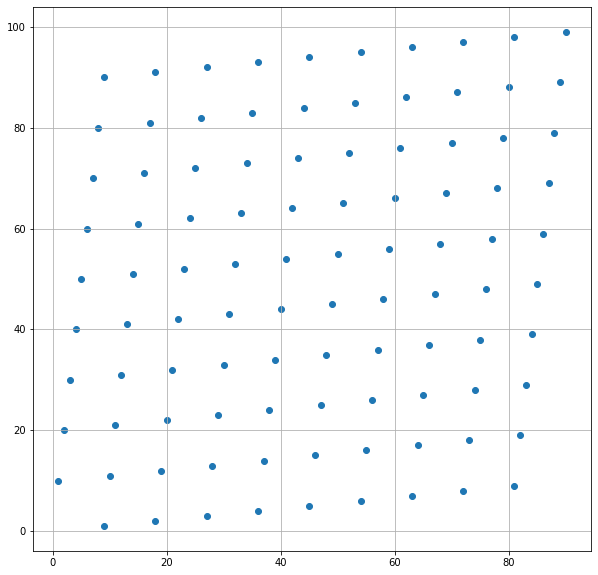

In [ ]:
edges = [(seed, TwoDigitRand(seed=seed).rand()) for seed in list(range(1,100))]
edges.sort(key=lambda t: t[1])
print(edges)

plt.subplots(figsize=(10, 10))
plt.scatter([e[1] for e in edges], [e[0] for e in edges])
plt.grid()
plt.show()